In [48]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [49]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system


In [50]:
league_name = 'Championship'
league_id = '48'
ccode = 'GBR'
season = '2024/2025'
round = '2'

In [51]:
params = {
    'season': season,
    'ccode3': ccode,
    'id': league_id
}
response = requests.get('https://www.fotmob.com/api/leagues',params=params)
data = response.json()

In [52]:
data = pd.DataFrame(data['matches']['allMatches'])

In [53]:
data

,round,roundName,pageUrl,id,home,away,status
0,1,1,/matches/blackburn-rovers-vs-derby-county/2xi6...,4520344,"{'name': 'Blackburn Rovers', 'shortName': 'Bla...","{'name': 'Derby County', 'shortName': 'Derby',...","{'utcTime': '2024-08-09T19:00:00Z', 'finished'..."
1,1,1,/matches/preston-north-end-vs-sheffield-united...,4520343,"{'name': 'Preston North End', 'shortName': 'Pr...","{'name': 'Sheffield United', 'shortName': 'She...","{'utcTime': '2024-08-09T19:00:00Z', 'finished'..."
2,1,1,/matches/cardiff-city-vs-sunderland/2c6tf4#451...,4519534,"{'name': 'Cardiff City', 'shortName': 'Cardiff...","{'name': 'Sunderland', 'shortName': 'Sunderlan...","{'utcTime': '2024-08-10T11:30:00Z', 'finished'..."
3,1,1,/matches/bristol-city-vs-hull-city/2ezumo#4519535,4519535,"{'name': 'Hull City', 'shortName': 'Hull', 'id...","{'name': 'Bristol City', 'shortName': 'Bristol...","{'utcTime': '2024-08-10T11:30:00Z', 'finished'..."
4,1,1,/matches/portsmouth-vs-leeds-united/2da8ci#451...,4519527,"{'name': 'Leeds United', 'shortName': 'Leeds',...","{'name': 'Portsmouth', 'shortName': 'Portsmout...","{'utcTime': '2024-08-10T11:30:00Z', 'finished'..."
...,...,...,...,...,...,...,...
547,46,46,/matches/blackburn-rovers-vs-sheffield-united/...,4520612,"{'name': 'Sheffield United', 'shortName': 'She...","{'name': 'Blackburn Rovers', 'shortName': 'Bla...","{'utcTime': '2025-05-03T14:00:00Z', 'started':..."
548,46,46,/matches/sunderland-vs-queens-park-rangers/2vh...,4520613,"{'name': 'Sunderland', 'shortName': 'Sunderlan...","{'name': 'Queens Park Rangers', 'shortName': '...","{'utcTime': '2025-05-03T14:00:00Z', 'started':..."
549,46,46,/matches/oxford-united-vs-swansea-city/2vmb0d#...,4520589,"{'name': 'Swansea City', 'shortName': 'Swansea...","{'name': 'Oxford United', 'shortName': 'Oxford...","{'utcTime': '2025-05-03T14:00:00Z', 'started':..."
550,46,46,/matches/watford-vs-sheffield-wednesday/3aujs7...,4520614,"{'name': 'Watford', 'shortName': 'Watford', 'i...","{'name': 'Sheffield Wednesday', 'shortName': '...","{'utcTime': '2025-05-03T14:00:00Z', 'started':..."


In [54]:
df = data[data['round'] == round]

In [55]:
match_df = pd.DataFrame()
# Assuming your DataFrame is called 'df'
for index, row in df.iterrows():
    params = {
        'matchId': row['id']
    }
    response = requests.get('https://www.fotmob.com/api/matchDetails',params=params)
    data = response.json()
    temp_df = pd.DataFrame(data['content']['shotmap']['shots'])
    temp_df['match_id'] = row['id']
    temp_df['venue'] = ''
    temp_df['teamName'] = ''
    temp_df['teamColor'] = ''
    for i in range(len(temp_df)):
        if temp_df['teamId'][i] == data['general']['homeTeam']['id']:
            temp_df['venue'][i] = 'H'
            temp_df['teamName'][i] = data['general']['homeTeam']['name']
            temp_df['teamColor'][i] = data['general']['teamColors']['lightMode']['home']
        else:
            temp_df['venue'][i] = 'A'
            temp_df['teamName'][i] = data['general']['awayTeam']['name']
            temp_df['teamColor'][i] = data['general']['teamColors']['lightMode']['away'] 
    match_df = pd.concat([match_df,temp_df])

C:\Users\dmsta\AppData\Local\Temp\ipykernel_16080\2007261990.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['venue'][i] = 'H'
C:\Users\dmsta\AppData\Local\Temp\ipykernel_16080\2007261990.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['teamName'][i] = data['general']['homeTeam']['name']
C:\Users\dmsta\AppData\Local\Temp\ipykernel_16080\2007261990.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['t

In [56]:
match_df

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,isOnTarget,blockedX,blockedY,goalCrossedY,goalCrossedZ,expectedGoals,expectedGoalsOnTarget,shotType,situation,period,isOwnGoal,onGoalShot,isSavedOffLine,isFromInsideBox,firstName,lastName,fullName,teamColor,match_id,venue,teamName
0,2709314307,Miss,8669,845985,Victor Torp,76.516019,22.597962,3,NaN,False,False,NaN,NaN,40.721667,1.162211,0.038146,0.000000,RightFoot,FreeKick,FirstHalf,False,"{'x': 1.1102230246251565e-16, 'y': 0.172905110...",False,False,Victor,Torp,Victor Torp,#65b0e4,4519537,H,Coventry City
1,2709319441,AttemptSaved,8669,848268,Haji Wright,97.184211,23.508790,9,NaN,True,True,98.535088,25.071250,32.856250,1.220000,0.173211,0.000000,RightFoot,RegularPlay,FirstHalf,False,"{'x': 1.3025793650793662, 'y': 0.3227513211640...",False,True,Haji,Wright,Haji Wright,#65b0e4,4519537,H,Coventry City
2,2709320855,AttemptSaved,8653,1086653,Tyler Goodrham,97.763158,22.878217,10,NaN,True,True,98.921053,23.859108,36.745000,1.220000,0.082000,0.000000,RightFoot,FastBreak,FirstHalf,False,"{'x': 0.2738095238095226, 'y': 0.3227513211640...",False,True,Tyler,Goodrham,Tyler Goodrham,#2b4790,4519537,A,Oxford United
3,2709321387,AttemptSaved,8653,862717,Przemyslaw Placheta,95.736842,37.507500,11,NaN,True,True,97.087719,37.202500,35.220000,1.220000,0.065330,0.000000,Header,ThrowInSetPiece,FirstHalf,False,"{'x': 0.6772486772486757, 'y': 0.3227513211640...",False,True,Przemyslaw,Placheta,Przemyslaw Placheta,#2b4790,4519537,A,Oxford United
4,2709322203,AttemptSaved,8669,1025603,Tatsuhiro Sakamoto,91.000000,28.118810,12,NaN,True,True,92.800000,29.211429,35.296250,1.220000,0.056172,0.000000,LeftFoot,RegularPlay,FirstHalf,False,"{'x': 0.6570767195767175, 'y': 0.3227513211640...",False,True,Tatsuhiro,Sakamoto,Tatsuhiro Sakamoto,#65b0e4,4519537,H,Coventry City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2710378183,AttemptSaved,10163,789596,Yan Valery,79.218932,21.617070,53,NaN,False,True,102.439655,32.322500,36.668750,1.502526,0.022902,0.201335,RightFoot,FromCorner,SecondHalf,False,"{'x': 0.29398148148148073, 'y': 0.397493732380...",False,False,Yan,Valery,Yan Valery,#0033A0,4519543,A,Sheffield Wednesday
20,2710386421,Miss,8472,527549,Patrick Roberts,94.482456,16.292229,67,NaN,False,False,NaN,NaN,39.797143,1.695158,0.024148,0.000000,LeftFoot,RegularPlay,SecondHalf,False,"{'x': -2.220446049250313e-16, 'y': 0.292412646...",False,True,Patrick,Roberts,Patrick Roberts,#DC0814,4519543,H,Sunderland
21,2710402011,AttemptSaved,10163,1077910,Di'Shon Bernard,79.331553,40.553571,89,NaN,True,True,81.696602,39.881190,33.695000,1.220000,0.014045,0.000000,RightFoot,RegularPlay,SecondHalf,False,"{'x': 1.0806878306878307, 'y': 0.3227513211640...",False,False,Di'Shon,Bernard,Di'Shon Bernard,#0033A0,4519543,A,Sheffield Wednesday
22,2710404635,Miss,10163,199276,Michael Smith,91.400000,37.202500,90,4.0,False,False,NaN,NaN,34.686250,7.478345,0.154883,0.000000,LeftFoot,RegularPlay,SecondHalf,False,"{'x': 0.9378523036170885, 'y': 0.6772486772486...",False,True,Michael,Smith,Michael Smith,#0033A0,4519543,A,Sheffield Wednesday


In [57]:
pd.set_option('display.max_columns', None)
match_df = match_df[['teamId','playerId','playerName','min','expectedGoals','eventType','teamColor','match_id','isOwnGoal','teamName','venue']]

In [58]:
df = match_df

In [59]:
df['teamName'] = df['teamName'].replace({'AFC Bournemouth':'Bournemouth','West Bromwich Albion':'West Brom','Preston North End':'Preston','Queens Park Rangers':'QPR','Blackburn Rovers':'Blackburn','Sheffield Wednesday':'Sheffield Weds','Huddersfield Town':'Huddersfield','Rotherham United':'Rotherham Utd', 'Tottenham Hotspur':'Tottenham', 'Newcastle United':'Newcastle Utd', 'Manchester United':'Manchester Utd', 'Brighton and Hove Albion':'Brighton','Brighton & Hove Albion':'Brighton', 'Wolverhampton Wanderers':'Wolves', 'Nottingham Forest':'Nott\'ham Forest', 'Sheffield United':'Sheffield Utd', 'West Ham United': 'West Ham'})

C:\Users\dmsta\AppData\Local\Temp\ipykernel_16080\2274540807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['teamName'] = df['teamName'].replace({'AFC Bournemouth':'Bournemouth','West Bromwich Albion':'West Brom','Preston North End':'Preston','Queens Park Rangers':'QPR','Blackburn Rovers':'Blackburn','Sheffield Wednesday':'Sheffield Weds','Huddersfield Town':'Huddersfield','Rotherham United':'Rotherham Utd', 'Tottenham Hotspur':'Tottenham', 'Newcastle United':'Newcastle Utd', 'Manchester United':'Manchester Utd', 'Brighton and Hove Albion':'Brighton','Brighton & Hove Albion':'Brighton', 'Wolverhampton Wanderers':'Wolves', 'Nottingham Forest':'Nott\'ham Forest', 'Sheffield United':'Sheffield Utd', 'West Ham United': 'West Ham'})


In [60]:
df['teamName'].unique()

array(['Coventry City', 'Oxford United', 'Middlesbrough', 'Derby County',
       'Luton Town', 'Portsmouth', 'West Brom', 'Leeds United',
       'Bristol City', 'Millwall', 'Cardiff City', 'Burnley',
       'Norwich City', 'Blackburn', 'Plymouth Argyle', 'Hull City', 'QPR',
       'Sheffield Utd', 'Swansea City', 'Preston', 'Stoke City',
       'Watford', 'Sheffield Weds', 'Sunderland'], dtype=object)

In [61]:
df

,teamId,playerId,playerName,min,expectedGoals,eventType,teamColor,match_id,isOwnGoal,teamName,venue
0,8669,845985,Victor Torp,3,0.038146,Miss,#65b0e4,4519537,False,Coventry City,H
1,8669,848268,Haji Wright,9,0.173211,AttemptSaved,#65b0e4,4519537,False,Coventry City,H
2,8653,1086653,Tyler Goodrham,10,0.082000,AttemptSaved,#2b4790,4519537,False,Oxford United,A
3,8653,862717,Przemyslaw Placheta,11,0.065330,AttemptSaved,#2b4790,4519537,False,Oxford United,A
4,8669,1025603,Tatsuhiro Sakamoto,12,0.056172,AttemptSaved,#65b0e4,4519537,False,Coventry City,H
...,...,...,...,...,...,...,...,...,...,...,...
19,10163,789596,Yan Valery,53,0.022902,AttemptSaved,#0033A0,4519543,False,Sheffield Weds,A
20,8472,527549,Patrick Roberts,67,0.024148,Miss,#DC0814,4519543,False,Sunderland,H
21,10163,1077910,Di'Shon Bernard,89,0.014045,AttemptSaved,#0033A0,4519543,False,Sheffield Weds,A
22,10163,199276,Michael Smith,90,0.154883,Miss,#0033A0,4519543,False,Sheffield Weds,A


In [63]:
df.groupby('playerName')['expectedGoals'].sum().sort_values(ascending=False)

playerName
Haji Wright        1.875354
Tom Bradshaw       1.424699
Kieffer Moore      1.176586
Borja Sainz        1.014719
Eliezer Mayenda    1.000167
                     ...   
Barry Bannan       0.011555
Moussa Sissoko     0.011289
Manolis Siopis     0.006492
Amari'i Bell       0.004806
Ethan Horvath      0.000000
Name: expectedGoals, Length: 165, dtype: float64

C:\Users\dmsta\AppData\Local\Temp\ipykernel_16080\4165360109.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min'] = df['min'].astype(int)
C:\Users\dmsta\AppData\Local\Temp\ipykernel_16080\4165360109.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xG'] = df['expectedGoals'].astype(float)


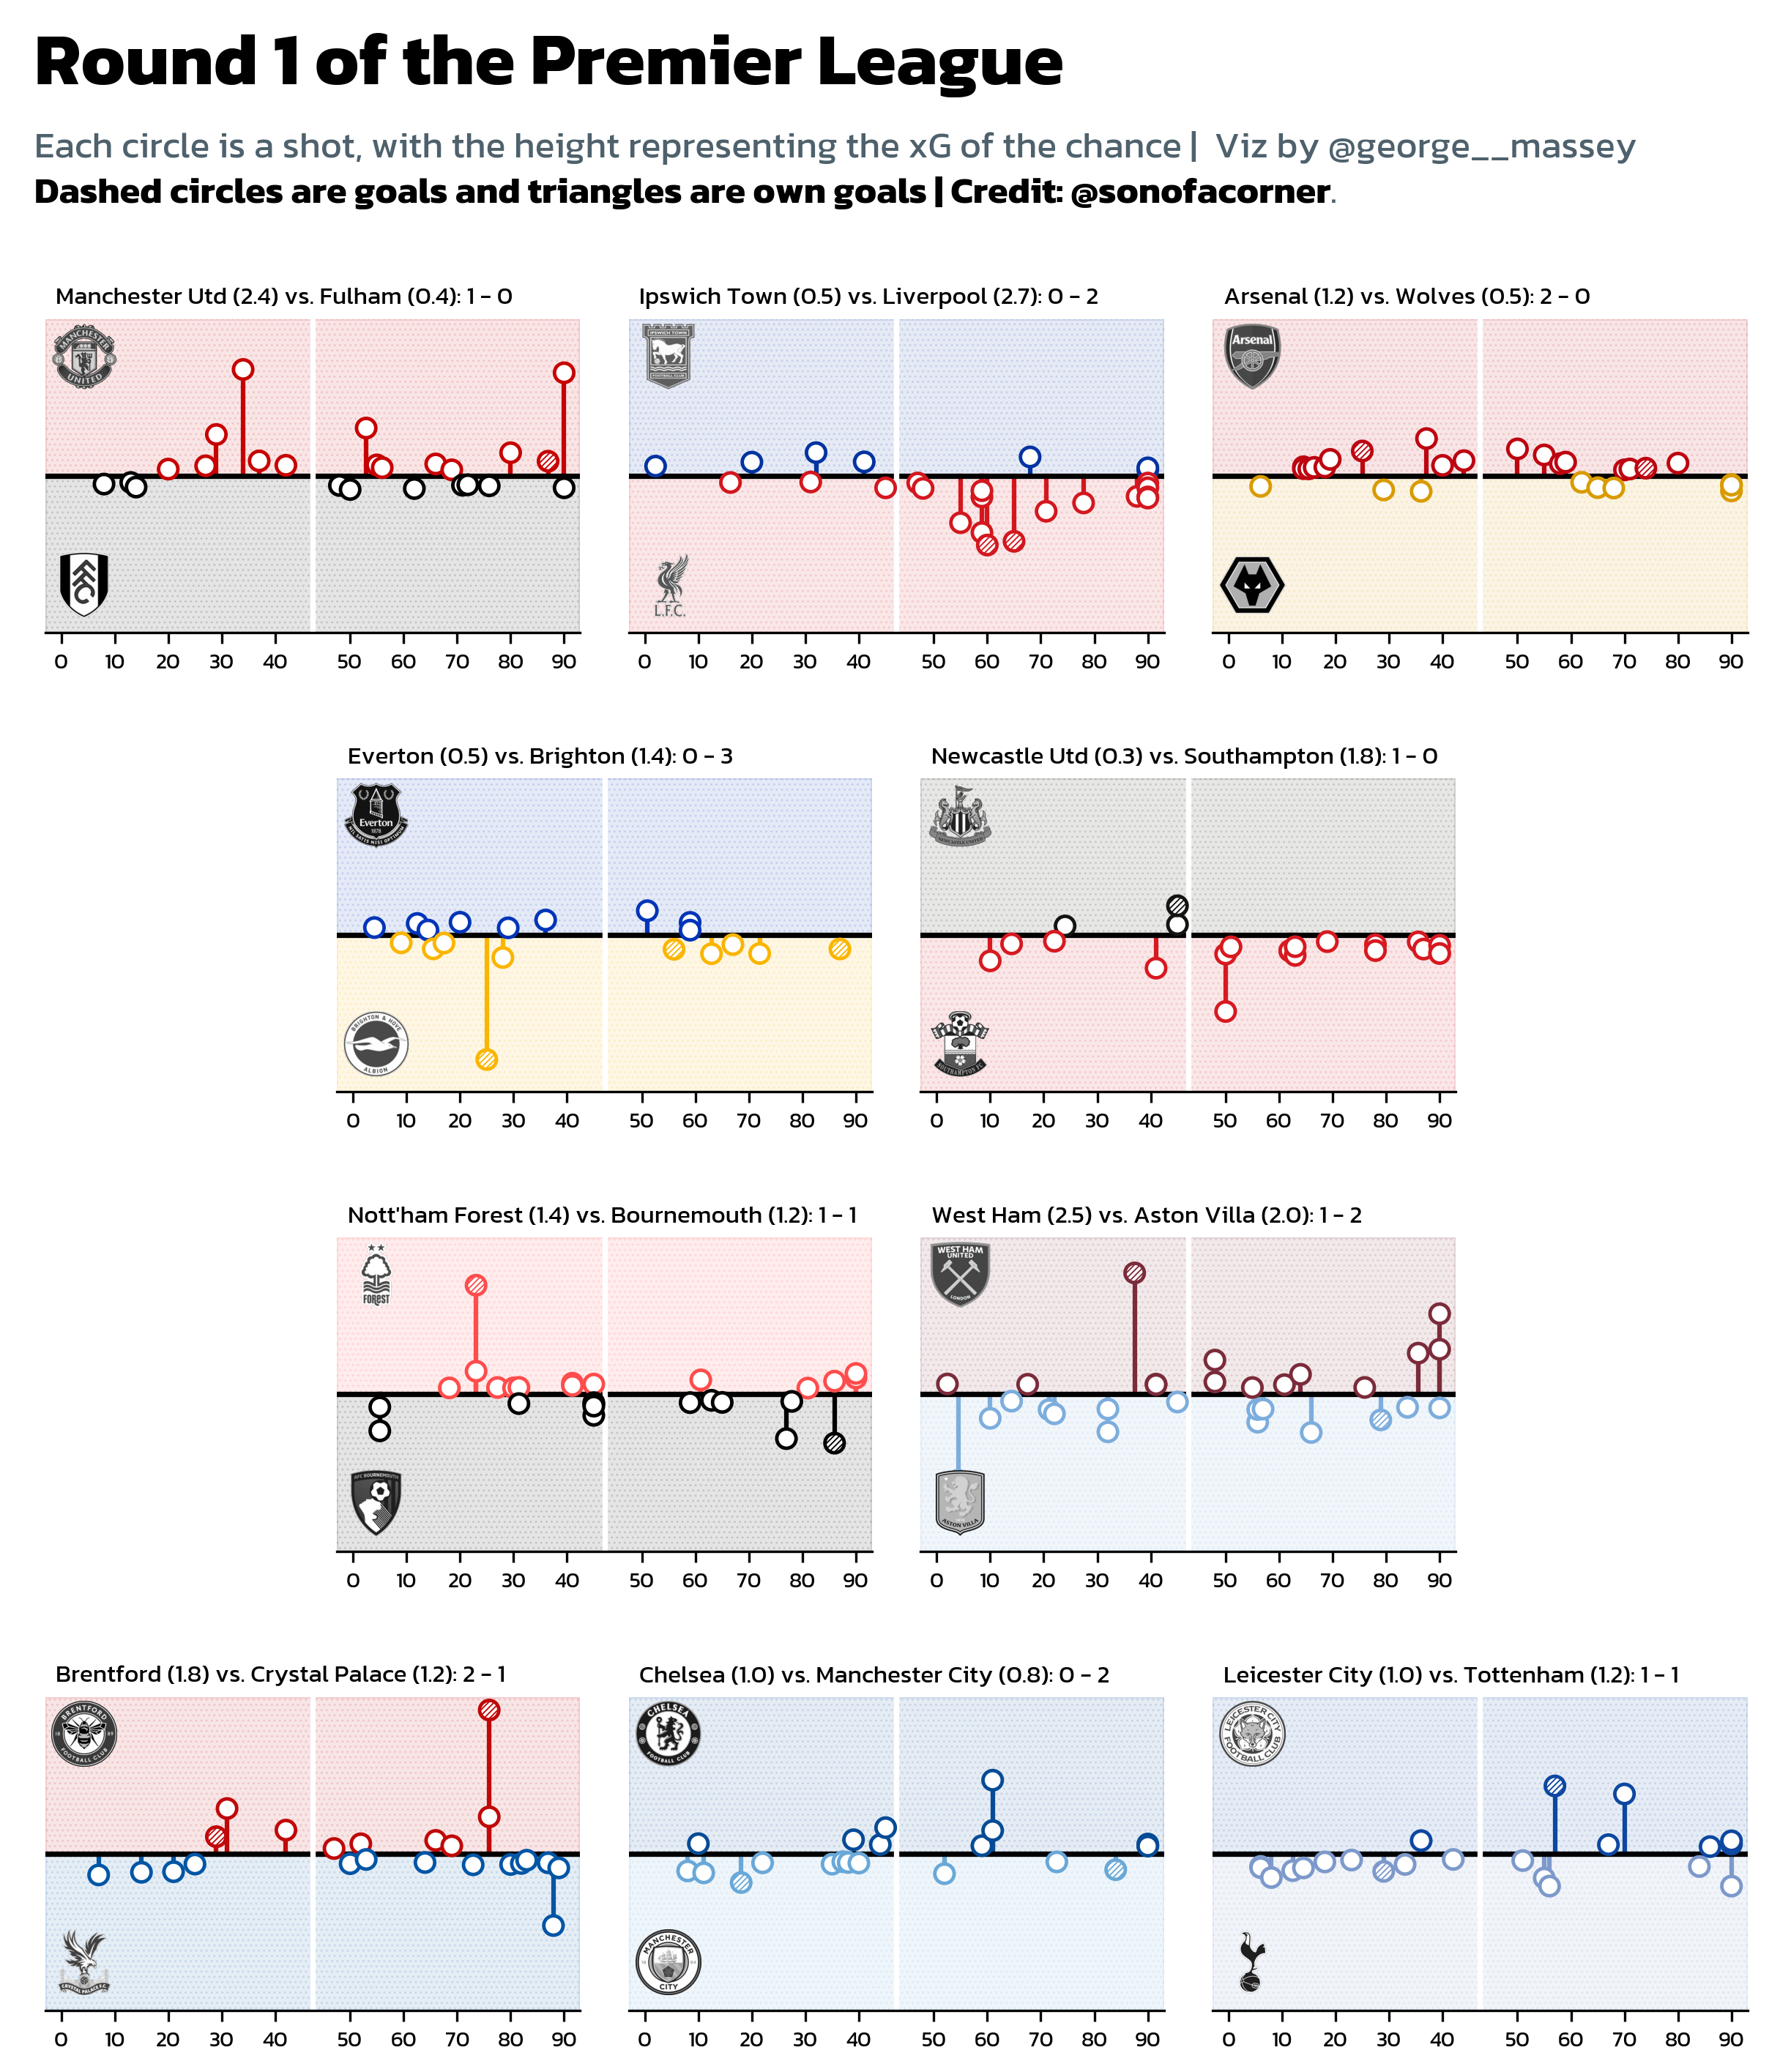

In [ ]:
# %%
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
from highlight_text import fig_text
import pandas as pd

from PIL import Image
import urllib
import os




# --- Read and transform the data

df['min'] = df['min'].astype(int)
df['xG'] = df['expectedGoals'].astype(float)

# ----------------------------------------------------------------
# Function to plot the xG match axes

def plot_axes_xg_by_match(ax, fig, match_id, data=df):
    '''
    This function plots the xG lollipop chart for a given match
    id.
    '''
    df = data.copy()
    match_df = df[df['match_id'] == match_id].reset_index(drop=True)
    match_df.sort_values(by='min', ascending=True).reset_index(drop=True)

    home_conditional = (match_df['venue'] == 'H')
    away_conditional = (match_df['venue'] == 'A')

    # -- Clean up the axes
    ax.set_ylim(-1.05,1.05)
    ax.set_xlim(-5,95)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks(
        [x for x in range(-2,45,10)] + [x for x in range(52,102,10)],
        labels=[x for x in range(0,91,10)], fontproperties = regular
    )
    ax.tick_params(labelsize=7)

    plt.rcParams['hatch.linewidth'] = 0.45

    home_color = match_df[home_conditional]['teamColor'].iloc[0]
    away_color = match_df[away_conditional]['teamColor'].iloc[0]
    for index, shot in enumerate(match_df[home_conditional]['xG']):
        ec_ = home_color
        marker = 'o'
        minute = match_df[home_conditional]['min'].iloc[index]
        if minute < 46:
            offset_x = -2
        else:
            offset_x = 2
        if match_df[home_conditional]['eventType'].iloc[index] != 'Goal':
            hatch = ''
            ax.scatter([minute + offset_x], [shot + .025], marker=marker, s=40, hatch=hatch, 
            color="white", zorder=3, lw=1.15, ec=ec_)
        else:
            hatch = '/////////////'
            if match_df[home_conditional]['isOwnGoal'].iloc[index]:
                shot = -1*shot
                ec_ = away_color
                marker = '^'
            ax.scatter([minute + offset_x], [shot + .025], marker=marker, s=40, hatch=hatch, 
                color="white", zorder=4, lw=1.15, ec=ec_)
        ax.plot([minute + offset_x, minute + offset_x], [0, shot], color=ec_, zorder=2)

    for index, shot in enumerate(match_df[away_conditional]['xG']):
        ec_ = away_color
        marker = 'o'
        minute = match_df[away_conditional]['min'].iloc[index]
        if minute < 46:
            offset_x = -2
        else:
            offset_x = 2
        if match_df[away_conditional]['eventType'].iloc[index] != 'Goal':
            hatch = ''
            ax.scatter([minute + offset_x], [-1*shot - .025], marker=marker, s=40, hatch=hatch, 
                color="white", zorder=3, lw=1.15, ec=ec_)
        else:
            hatch = '/////////////'
            if match_df[away_conditional]['isOwnGoal'].iloc[index]:
                shot = -1*shot
                ec_ = home_color
                marker = 'v'
            ax.scatter([minute + offset_x], [-1*shot - .025], marker=marker, s=40, hatch=hatch, 
                color="white", zorder=4, lw=1.15, ec=ec_)
        ax.plot([minute + offset_x, minute + offset_x], [0, -1*shot], color=ec_, zorder=2)

    # --- Make it pretty ---
    ax.plot([-5,95], [0,0], color='black', lw=1.75)
    ax.plot([45,45], [-1.05,1.05], color='white', lw=1.75, zorder=2)
    ax.fill_between(
        x=[-5,95], y1=[0], y2=[1.05],
        color=home_color, alpha=0.1, zorder=1,
        hatch="......."
    )
    ax.fill_between(
        x=[-5,95], y1=[0], y2=[-1.05],
        color=away_color, alpha=0.1, zorder=1,
        hatch="......."
    )

    # --- Add the logos and legend ---
    home_team_id = match_df[home_conditional]['teamId'].iloc[0]
    away_team_id = match_df[away_conditional]['teamId'].iloc[0]
    home_team_name = match_df[home_conditional]['teamName'].iloc[0]
    away_team_name = match_df[away_conditional]['teamName'].iloc[0]

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'

    ax_coords = DC_to_NFC([-3.8, .58])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = 'W')
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{home_team_id:.0f}.png')).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis('off')

    ax_coords = DC_to_NFC([-3.8, -.95])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = 'W')
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{away_team_id:.0f}.png')).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis('off')

    # --- Compute goals and xG
    home_xG = match_df[home_conditional & (match_df['isOwnGoal'] == False)]['xG'].sum()
    away_xG = match_df[away_conditional & (match_df['isOwnGoal'] == False)]['xG'].sum()
    home_goals = (match_df[home_conditional & (match_df['isOwnGoal'] == False)]['eventType'] == 'Goal').sum() + (match_df[away_conditional & (match_df['isOwnGoal'] == True)]['eventType'] == 'Goal').sum()
    away_goals = (match_df[away_conditional & (match_df['isOwnGoal'] == False)]['eventType'] == 'Goal').sum() + (match_df[home_conditional & (match_df['isOwnGoal'] == True)]['eventType'] == 'Goal').sum()

    ax.annotate(
        xy=(0.02, 1.05),
        text=f'{home_team_name} ({home_xG:.1f}) vs. {away_team_name} ({away_xG:.1f}): {home_goals} - {away_goals}',
        xycoords='axes fraction',
        size=8,
        fontproperties = regular
    )

    return ax


# --- The Final Visual

if league_name == 'Premier League':
    layout_ = '''
        AABBCC
        ......
        .DDEE.
        ......
        .FFGG.
        ......
        HHIIJJ
    '''
elif league_name == 'Championship':
    layout_ = '''
        AABBCC
        ......
        DDEEFF
        ......
        GGHHII
        ......
        JJKKLL
    '''

height_ratios = [1,.05,1,.05,1,.05,1]

f = plt.figure(figsize=(10,10), dpi=300)
axs = f.subplot_mosaic(
    layout_, 
    gridspec_kw={
        'height_ratios':height_ratios,
        'hspace': 0.35
    }
)

counter = 0
#df = df.sort_values(by='match_id').reset_index(drop=True)
matches = list(df['match_id'].unique())
for k, ax in axs.items():
    match_id = matches[counter]
    plot_axes_xg_by_match(ax, f, match_id=match_id, data=df)
    counter += 1

fig_text(
    x = 0.12, y = .98, 
    s = f"Round {round} of the {league_name}",
    # highlight_textprops=[{"style":"italic"}],
    va = "bottom", ha = "left",
    fontsize = 24, color = "black", font = bold, weight = "bold"
)
fig_text(
	x = 0.12, y = .93, 
    s = "Each circle is a shot, with the height representing the xG of the chance |  Viz by @george__massey\n<Dashed circles are goals and triangles are own goals | Credit: @sonofacorner>.",
    highlight_textprops=[{"font": bold, "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 12, color = "#4E616C", font = regular
)

plt.savefig(
	f"C:/Users/George/Documents/Football Analytics/Visuals/{league_name} Round {round} Lollipop Chart.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)